In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
# To load the environment variable defined in the .env file
from dotenv import load_dotenv
load_dotenv();

In [20]:
import src.models.LogisticRegression as LogReg
import src.features.build_features as FeaturesManager
import src.visualization.visualize as VizManager
import pickle
from comet_ml import API
import os
from sklearn.metrics import classification_report


In [17]:
api = API()

workspace_name = "ift6758-a22-g08"

# Download the Logistic Regresion on Distance
api.download_registry_model(workspace_name, "logisticregression-distance", "1.0.0", output_path=os.environ["NHL_MODEL_DIR"], expand=True)
pkl_filename = os.path.join(os.environ["NHL_MODEL_DIR"], "LogisticRegression_distance.pkl")
with open(pkl_filename, 'rb') as file:
    clf_distance = pickle.load(file)


# Download the Logistic Regresion on Angle
api.download_registry_model(workspace_name, "logisticregression-angle", "1.0.0", output_path=os.environ["NHL_MODEL_DIR"], expand=True)
pkl_filename = os.path.join(os.environ["NHL_MODEL_DIR"], "LogisticRegression_angle.pkl")
with open(pkl_filename, 'rb') as file:
    clf_angle = pickle.load(file)


# Download the Logistic Regresion on Distance and Angle
api.download_registry_model(workspace_name, "logisticregression-distance-angle", "1.0.0", output_path=os.environ["NHL_MODEL_DIR"], expand=True)
pkl_filename = os.path.join(os.environ["NHL_MODEL_DIR"], "LogisticRegression_distance_angle.pkl")
with open(pkl_filename, 'rb') as file:
    clf_distance_angle = pickle.load(file)

COMET INFO: Downloading registry model 'logisticregression-distance', version '1.0.0', stage None from workspace 'ift6758-a22-g08'...
COMET INFO: Unzipping model to '/mnt/d/GitHub/IFT6758-A2022-G08/models' ...
COMET INFO: done!
COMET INFO: Downloading registry model 'logisticregression-angle', version '1.0.0', stage None from workspace 'ift6758-a22-g08'...
COMET INFO: Unzipping model to '/mnt/d/GitHub/IFT6758-A2022-G08/models' ...
COMET INFO: done!
COMET INFO: Downloading registry model 'logisticregression-distance-angle', version '1.0.0', stage None from workspace 'ift6758-a22-g08'...
COMET INFO: Unzipping model to '/mnt/d/GitHub/IFT6758-A2022-G08/models' ...
COMET INFO: done!


In [25]:
season_year = 2019
season_type = "Regular"    
features_data = FeaturesManager.build_features([season_year], season_type)
# We take the absolute value, for symmetry reasons
features_data['Shot angle'] = features_data['Shot angle'].abs()
y_test = features_data['Is Goal']

print(classification_report(y_test, clf_distance.predict(features_data[['Shot distance']])))
print(classification_report(y_test, clf_angle.predict(features_data[['Shot angle']])))
print(classification_report(y_test, clf_distance_angle.predict(features_data[['Shot distance', 'Shot angle']])))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     59641
         1.0       0.00      0.00      0.00      6404

    accuracy                           0.90     66045
   macro avg       0.45      0.50      0.47     66045
weighted avg       0.82      0.90      0.86     66045

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     59641
         1.0       0.00      0.00      0.00      6404

    accuracy                           0.90     66045
   macro avg       0.45      0.50      0.47     66045
weighted avg       0.82      0.90      0.86     66045

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     59641
         1.0       0.00      0.00      0.00      6404

    accuracy                           0.90     66045
   macro avg       0.45      0.50      0.47     66045
weighted avg       0.82      0.90      0.86     66045



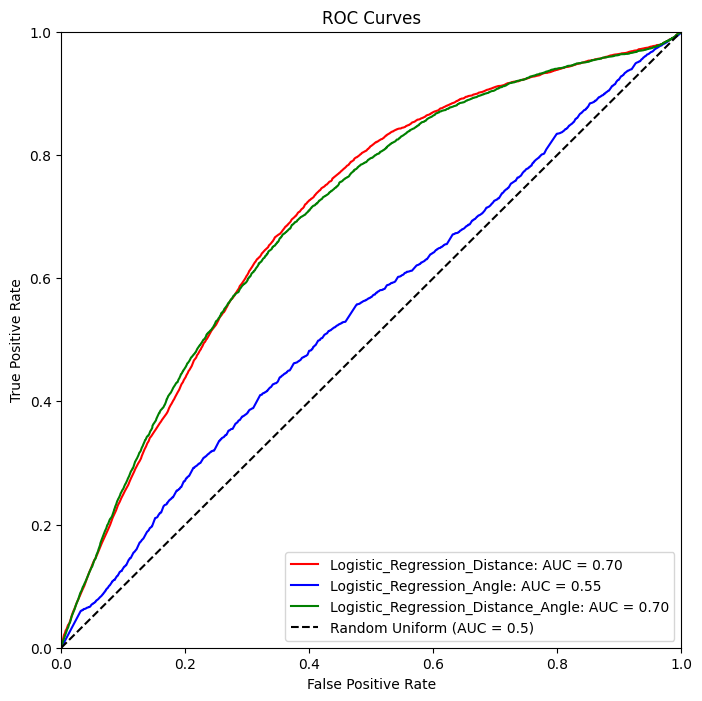

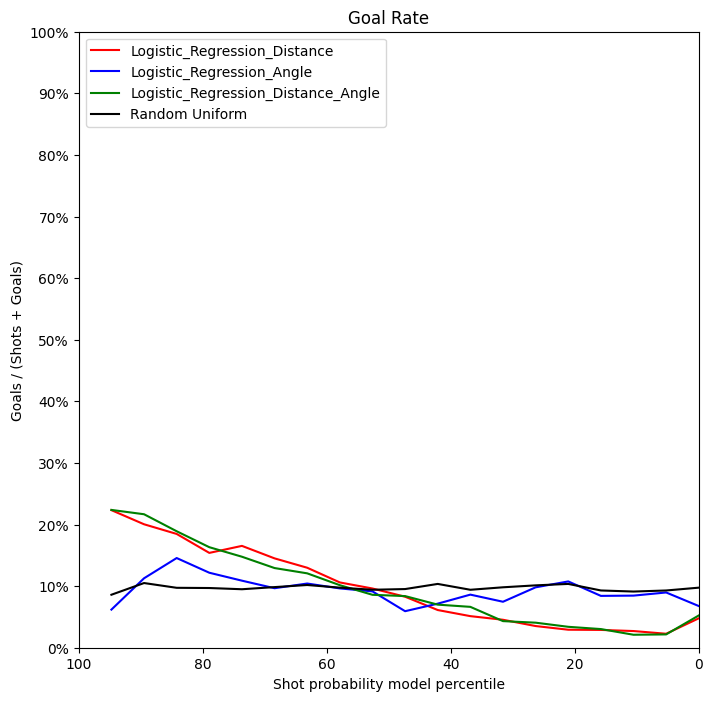

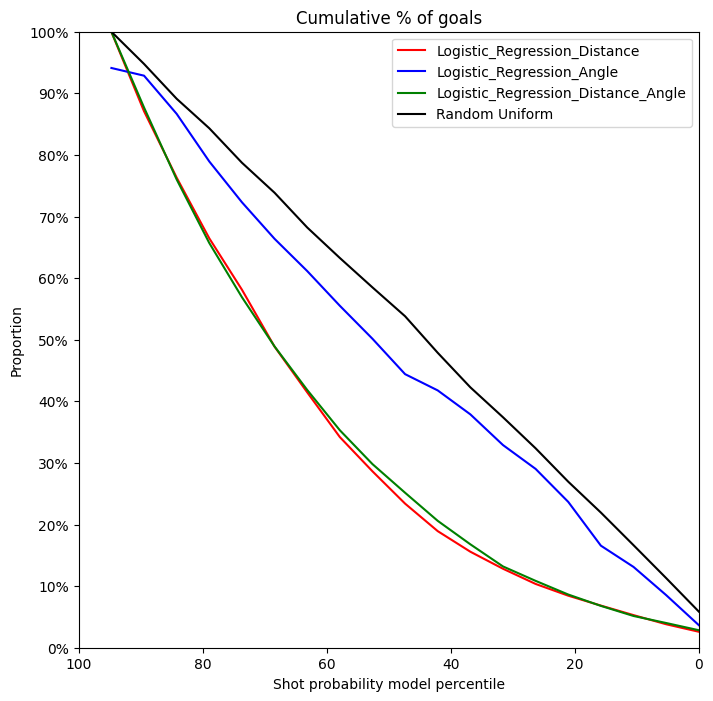

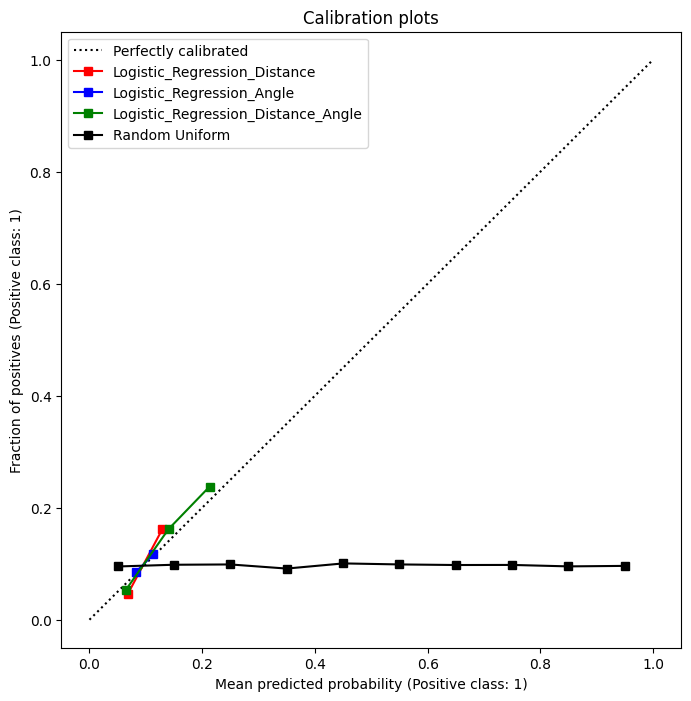

In [26]:
classifiers = [(clf_distance, 'Logistic_Regression_Distance', features_data[['Shot distance']], y_test),
               (clf_angle, 'Logistic_Regression_Angle', features_data[['Shot angle']], y_test),
               (clf_distance_angle, 'Logistic_Regression_Distance_Angle', features_data[['Shot distance', 'Shot angle']], y_test) ]


VizManager.plot_all_figures(classifiers, add_random=True)

In [27]:
season_year = 2019
season_type = "Playoffs"    
features_data = FeaturesManager.build_features([season_year], season_type)
# We take the absolute value, for symmetry reasons
features_data['Shot angle'] = features_data['Shot angle'].abs()
y_test = features_data['Is Goal']

print(classification_report(y_test, clf_distance.predict(features_data[['Shot distance']])))
print(classification_report(y_test, clf_angle.predict(features_data[['Shot angle']])))
print(classification_report(y_test, clf_distance_angle.predict(features_data[['Shot distance', 'Shot angle']])))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      4346
           1       0.00      0.00      0.00       428

    accuracy                           0.91      4774
   macro avg       0.46      0.50      0.48      4774
weighted avg       0.83      0.91      0.87      4774

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      4346
           1       0.00      0.00      0.00       428

    accuracy                           0.91      4774
   macro avg       0.46      0.50      0.48      4774
weighted avg       0.83      0.91      0.87      4774

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      4346
           1       0.00      0.00      0.00       428

    accuracy                           0.91      4774
   macro avg       0.46      0.50      0.48      4774
weighted avg       0.83      0.91      0.87      4774



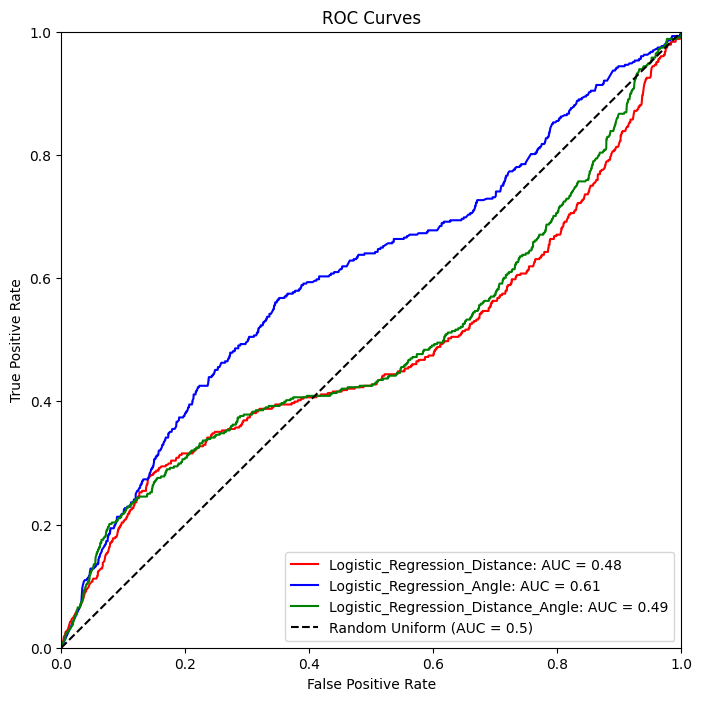

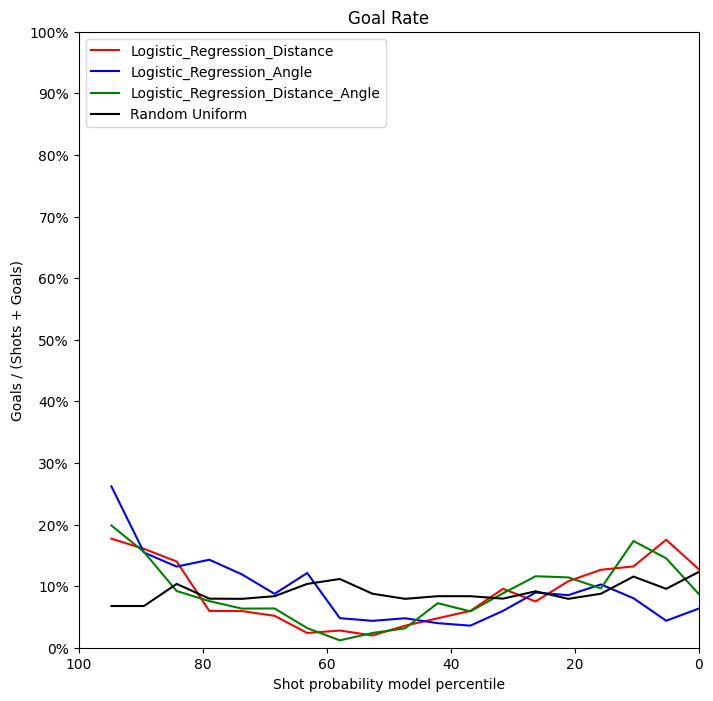

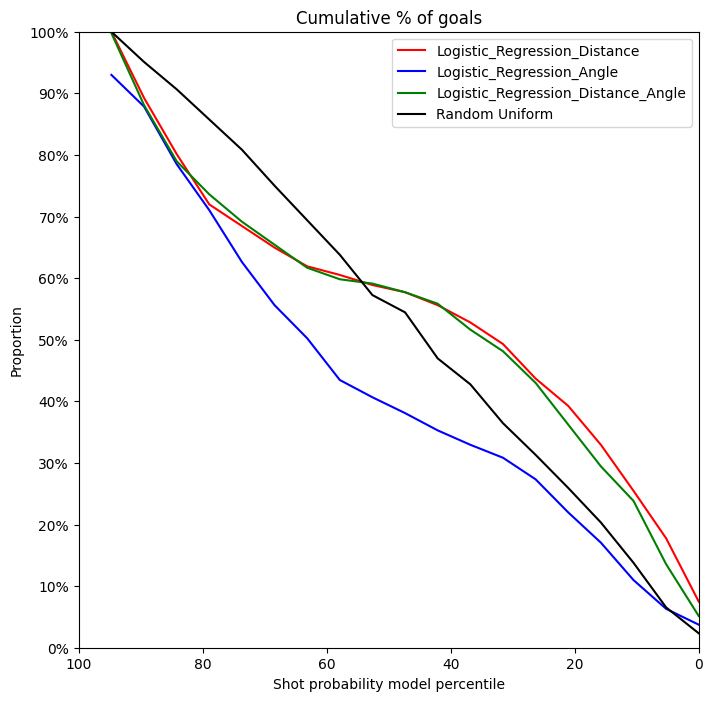

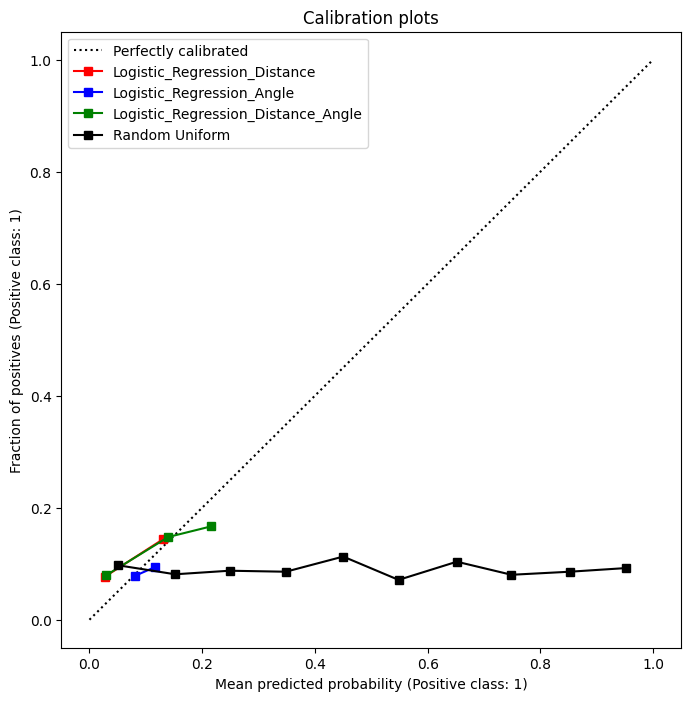

In [28]:
classifiers = [(clf_distance, 'Logistic_Regression_Distance', features_data[['Shot distance']], y_test),
               (clf_angle, 'Logistic_Regression_Angle', features_data[['Shot angle']], y_test),
               (clf_distance_angle, 'Logistic_Regression_Distance_Angle', features_data[['Shot distance', 'Shot angle']], y_test) ]


VizManager.plot_all_figures(classifiers, add_random=True)